In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
%matplotlib inline

In [2]:
data = pd.read_csv('appstore_games.csv')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


- `URL` - The URL
- `ID` - The assigned ID
- `Name` - The name
- `Subtitle` - The secondary text under the name
- `Icon URL` - 512px x 512px jpg
- `Average User Rating` - Rounded to nearest .5, requires at least 5 ratings
- `User Rating Count` - Number of ratings internationally, null means it is below 5
- `Price` - Price in USD
- `In-app Purchases` - Prices of available in-app purchases
- `Description` - App description
- `Developer` - App developer
- `Age Rating` - Either 4+, 9+, 12+ or 17+
- `Languages` - ISO2A language codes
- `Size` - Size of the app in bytes
- `Primary Genre` - Main genre
- `Genres` - Genres of the app
- `Original Release Date` - When it was released
- `Current Version Release Date` - When it was last updated

This is the data of 17007 strategy games on the Apple App Store. It was collected on the 3rd of August 2019, using the iTunes API and the App Store sitemap.

**Prediction task is to determine Average User Rating.**


In [5]:
print(data.shape)
print(data.columns)

(17007, 18)
Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')


In [6]:
data.index

RangeIndex(start=0, stop=17007, step=1)

In [7]:
data.describe()

,ID,Average User Rating,User Rating Count,Price,Size
count,1.700700e+04,7561.000000,7.561000e+03,16983.000000,1.700600e+04
mean,1.059614e+09,4.060905,3.306531e+03,0.813419,1.157064e+08
std,2.999676e+08,0.751428,4.232256e+04,7.835732,2.036477e+08
min,2.849214e+08,1.000000,5.000000e+00,0.000000,5.132800e+04
25%,8.996543e+08,3.500000,1.200000e+01,0.000000,2.295014e+07
50%,1.112286e+09,4.500000,4.600000e+01,0.000000,5.676895e+07
75%,1.286983e+09,4.500000,3.090000e+02,0.000000,1.330271e+08
max,1.475077e+09,5.000000,3.032734e+06,179.990000,4.005591e+09


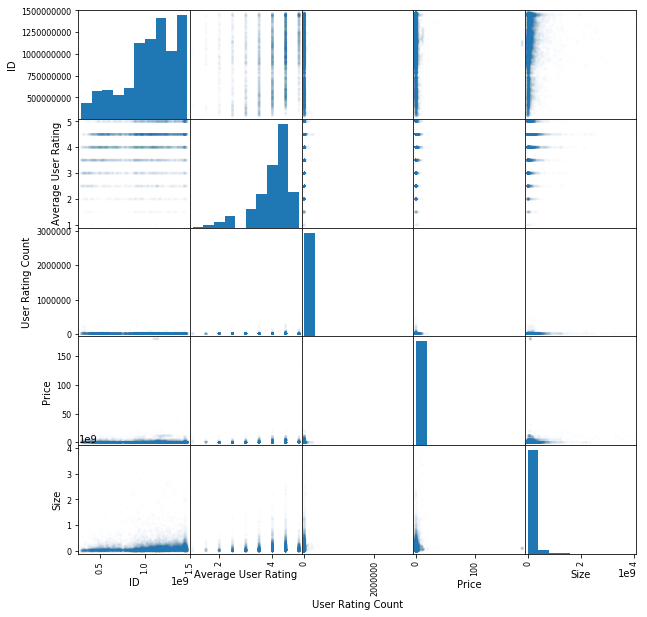

In [8]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .01, figsize = (10, 10))
pass

In [9]:
data.corr()

,ID,Average User Rating,User Rating Count,Price,Size
ID,1.000000,0.210280,-0.033052,-0.004187,0.143711
Average User Rating,0.210280,1.000000,0.033025,-0.000414,0.061617
User Rating Count,-0.033052,0.033025,1.000000,-0.011149,0.037736
Price,-0.004187,-0.000414,-0.011149,1.000000,0.033502
Size,0.143711,0.061617,0.037736,0.033502,1.000000


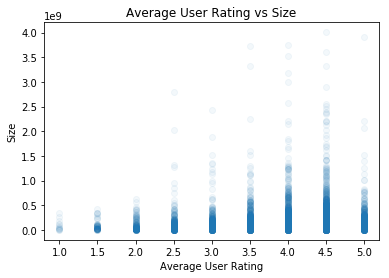

In [10]:
plt.plot(data['Average User Rating'], data['Size'], 'o', alpha = 0.05)
plt.xlabel('Average User Rating')
plt.ylabel('Size')
plt.title('Average User Rating vs Size')
pass

In [11]:
data['Average User Rating'] >= 4

0         True
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24        True
25       False
26        True
27       False
28       False
29       False
         ...  
16977    False
16978    False
16979    False
16980    False
16981    False
16982    False
16983    False
16984    False
16985    False
16986    False
16987    False
16988    False
16989    False
16990    False
16991    False
16992    False
16993     True
16994    False
16995    False
16996    False
16997    False
16998    False
16999    False
17000    False
17001    False
17002    False
17003    False
17004    False
17005    False
17006    False
Name: Average User Rating, Length: 17007, dtype: bool

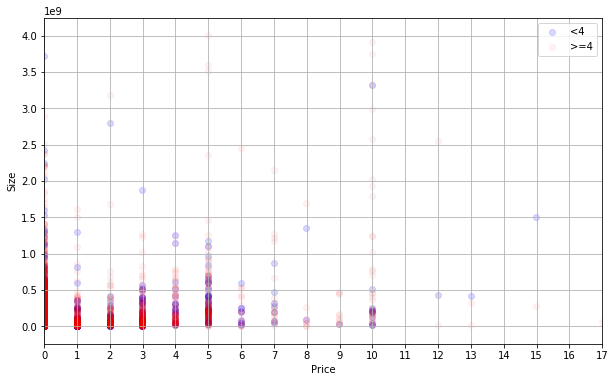

In [12]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['Average User Rating'] < 4 ]['Price'],
            data[data['Average User Rating'] < 4]['Size'],
            alpha = 0.15,
            label = '<4',
            color = 'b')

plt.scatter(data[data['Average User Rating'] >= 4]['Price'],
            data[data['Average User Rating'] >= 4]['Size'],
            alpha = 0.05,
            label = '>=4',
            color = 'r')

plt.xlabel('Price')
plt.xticks(range(18))
plt.xlim(0, 17)
plt.ylabel('Size')
plt.legend()
plt.grid()

In [13]:
data.describe(include = ['object'])

,URL,Name,Subtitle,Icon URL,In-app Purchases,Description,Developer,Age Rating,Languages,Primary Genre,Genres,Original Release Date,Current Version Release Date
count,17007,17007,5261,17007,7683,17007,17007,17007,16947,17007,17007,17007,17007
unique,16847,16847,5010,16847,3803,16473,8693,4,990,21,1004,3084,2512
top,https://apps.apple.com/us/app/star-candy-littl...,Savagerealm Pong,Emoji Stickers,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,0.99,#NAME?,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,4+,EN,Games,"Games, Strategy, Puzzle",2/09/2016,1/08/2019
freq,2,2,14,2,943,17,123,11806,12467,16286,778,75,118


In [14]:
data.describe(include = 'all')

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
count,17007,1.700700e+04,17007,5261,17007,7561.000000,7.561000e+03,16983.000000,7683,17007,17007,17007,16947,1.700600e+04,17007,17007,17007,17007
unique,16847,NaN,16847,5010,16847,NaN,NaN,NaN,3803,16473,8693,4,990,NaN,21,1004,3084,2512
top,https://apps.apple.com/us/app/star-candy-littl...,NaN,Savagerealm Pong,Emoji Stickers,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,NaN,0.99,#NAME?,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,4+,EN,NaN,Games,"Games, Strategy, Puzzle",2/09/2016,1/08/2019
freq,2,NaN,2,14,2,NaN,NaN,NaN,943,17,123,11806,12467,NaN,16286,778,75,118
mean,NaN,1.059614e+09,NaN,NaN,NaN,4.060905,3.306531e+03,0.813419,NaN,NaN,NaN,NaN,NaN,1.157064e+08,NaN,NaN,NaN,NaN
std,NaN,2.999676e+08,NaN,NaN,NaN,0.751428,4.232256e+04,7.835732,NaN,NaN,NaN,NaN,NaN,2.036477e+08,NaN,NaN,NaN,NaN
min,NaN,2.849214e+08,NaN,NaN,NaN,1.000000,5.000000e+00,0.000000,NaN,NaN,NaN,NaN,NaN,5.132800e+04,NaN,NaN,NaN,NaN
25%,NaN,8.996543e+08,NaN,NaN,NaN,3.500000,1.200000e+01,0.000000,NaN,NaN,NaN,NaN,NaN,2.295014e+07,NaN,NaN,NaN,NaN
50%,NaN,1.112286e+09,NaN,NaN,NaN,4.500000,4.600000e+01,0.000000,NaN,NaN,NaN,NaN,NaN,5.676895e+07,NaN,NaN,NaN,NaN
75%,NaN,1.286983e+09,NaN,NaN,NaN,4.500000,3.090000e+02,0.000000,NaN,NaN,NaN,NaN,NaN,1.330271e+08,NaN,NaN,NaN,NaN


In [15]:
data['Developer'].unique()

array(['Mighty Mighty Good Games', 'Kiss The Machine', 'Bayou Games', ...,
       'Vishal Baldha', 'Tayrem Games', 'ming bo tang'], dtype=object)

## Задача


In [16]:
data.drop(['Price','Size'], axis = 1) # так тоже работает

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,In-app Purchases,Description,Developer,Age Rating,Languages,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
5,https://apps.apple.com/us/app/sudoku-classic-n...,286210009,Sudoku - Classic number puzzle,Original brain training,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.0,47.0,1.99,"Sudoku will tease your brain, challenge you or...",OutOfTheBit Ltd,4+,EN,Games,"Games, Entertainment, Strategy, Puzzle",30/07/2008,29/04/2019
6,https://apps.apple.com/us/app/gravitation/id28...,286313771,Gravitation,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,35.0,NaN,"""Gravitation is a new implementation of the pu...",Robert Farnum,4+,NaN,Games,"Games, Entertainment, Puzzle, Strategy",30/07/2008,14/11/2013
7,https://apps.apple.com/us/app/colony/id286363959,286363959,Colony,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,125.0,NaN,"""50 levels of addictive puzzling strategy fun!...",Chris Haynes,4+,EN,Games,"Games, Strategy, Board",3/08/2008,3/10/2018
8,https://apps.apple.com/us/app/carte/id286566987,286566987,Carte,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,2.5,44.0,NaN,"""Jeu simple qui consiste \xe0 trouver comment ...",Jean-Francois Pautex,4+,FR,Games,"Games, Strategy, Board, Entertainment",3/08/2008,23/11/2017
9,https://apps.apple.com/us/app/barrels-o-fun/id...,286682679,"""Barrels O' Fun""",NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,2.5,184.0,NaN,Barrels O\u2019 Fun is a simple but challengin...,BesqWare,4+,EN,Games,"Games, Casual, Strategy",1/08/2008,1/08/2008


# Готовим данные

In [17]:
print('Size',data['Size'].dtype.name)
print('price',data['Price'].dtype.name)
print('Genres',data['Genres'].dtype.name)
print('Average User Rating',data['Average User Rating'].dtype.name)

Size float64
price float64
Genres object
Average User Rating float64


In [18]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print('categorical_columns',categorical_columns)
print()
print('numerical_columns',numerical_columns)

categorical_columns ['URL', 'Name', 'Subtitle', 'Icon URL', 'In-app Purchases', 'Description', 'Developer', 'Age Rating', 'Languages', 'Primary Genre', 'Genres', 'Original Release Date', 'Current Version Release Date']

numerical_columns ['ID', 'Average User Rating', 'User Rating Count', 'Price', 'Size']


In [19]:
# categorical_columns = ['Developer', 'Age Rating', 'Languages', 'Primary Genre', 'Genres']
categorical_columns = [ 'Age Rating', 'Primary Genre', 'Genres']
print('categorical_columns',categorical_columns)

numerical_columns = ['Average User Rating', 'User Rating Count', 'Price', 'Size']
print('numerical_columns',numerical_columns)

categorical_columns ['Age Rating', 'Primary Genre', 'Genres']
numerical_columns ['Average User Rating', 'User Rating Count', 'Price', 'Size']


In [20]:
for c in categorical_columns:
    print(c, data[c].unique())

Age Rating ['4+' '9+' '12+' '17+']
Primary Genre ['Games' 'Entertainment' 'Finance' 'Sports' 'Reference' 'Medical'
 'Education' 'Utilities' 'Book' 'Travel' 'Productivity' 'Lifestyle'
 'Business' 'News' 'Social Networking' 'Health & Fitness' 'Music'
 'Stickers' 'Food & Drink' 'Shopping' 'Navigation']
Genres ['Games, Strategy, Puzzle' 'Games, Strategy, Board'
 'Games, Board, Strategy' ... 'Games, Strategy, Sports, Music'
 'Social Networking, Games, Strategy, Casual'
 'Sports, Racing, Games, Strategy']


## Обрабатываем пропущенные значения


In [21]:
data.median(axis = 0)

ID                     1.112286e+09
Average User Rating    4.500000e+00
User Rating Count      4.600000e+01
Price                  0.000000e+00
Size                   5.676895e+07
dtype: float64

In [22]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [23]:
data[numerical_columns].count(axis = 0)

Average User Rating    17007
User Rating Count      17007
Price                  17007
Size                   17007
dtype: int64

In [24]:
data[categorical_columns].count(axis = 0)

Age Rating       17007
Primary Genre    17007
Genres           17007
dtype: int64

In [25]:
data['Genres'].describe()

count                       17007
unique                       1004
top       Games, Strategy, Puzzle
freq                          778
Name: Genres, dtype: object

In [26]:
type(data['Genres'].describe())

pandas.core.series.Series

In [27]:
data['Genres'].describe().top

'Games, Strategy, Puzzle'

In [28]:
data['Genres'] = data['Genres'].fillna('Games, Strategy, Puzzle')

In [29]:
data.describe(include = [object])

,URL,Name,Subtitle,Icon URL,In-app Purchases,Description,Developer,Age Rating,Languages,Primary Genre,Genres,Original Release Date,Current Version Release Date
count,17007,17007,5261,17007,7683,17007,17007,17007,16947,17007,17007,17007,17007
unique,16847,16847,5010,16847,3803,16473,8693,4,990,21,1004,3084,2512
top,https://apps.apple.com/us/app/star-candy-littl...,Savagerealm Pong,Emoji Stickers,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,0.99,#NAME?,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,4+,EN,Games,"Games, Strategy, Puzzle",2/09/2016,1/08/2019
freq,2,2,14,2,943,17,123,11806,12467,16286,778,75,118


In [30]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [31]:
data.describe(include = [object])

,URL,Name,Subtitle,Icon URL,In-app Purchases,Description,Developer,Age Rating,Languages,Primary Genre,Genres,Original Release Date,Current Version Release Date
count,17007,17007,5261,17007,7683,17007,17007,17007,16947,17007,17007,17007,17007
unique,16847,16847,5010,16847,3803,16473,8693,4,990,21,1004,3084,2512
top,https://apps.apple.com/us/app/star-candy-littl...,Savagerealm Pong,Emoji Stickers,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,0.99,#NAME?,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,4+,EN,Games,"Games, Strategy, Puzzle",2/09/2016,1/08/2019
freq,2,2,14,2,943,17,123,11806,12467,16286,778,75,118


## Векторизация

In [32]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['Age Rating', 'Primary Genre', 'Genres']


In [33]:
print(data['Genres'].unique())
print(type(data['Average User Rating'].unique()))
print(type(data['Average User Rating'].unique()[0]))

['Games, Strategy, Puzzle' 'Games, Strategy, Board'
 'Games, Board, Strategy' ... 'Games, Strategy, Sports, Music'
 'Social Networking, Games, Strategy, Casual'
 'Sports, Racing, Games, Strategy']
<class 'numpy.ndarray'>
<class 'numpy.float64'>


In [34]:
tmp = data['Average User Rating'] == 1.0
data['Average User Rating'][tmp] = 1.5

rating = data['Average User Rating'].unique()
for rate in rating:
    tmp = data['Average User Rating'] == rate
    print(rate, tmp.sum())

4.0 1722
3.5 925
3.0 514
2.5 317
4.5 12307
2.0 158
1.5 74
5.0 990


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Age Rating_12+', 'Age Rating_17+', 'Age Rating_4+', 'Age Rating_9+',
       'Primary Genre_Book', 'Primary Genre_Business',
       'Primary Genre_Education', 'Primary Genre_Entertainment',
       'Primary Genre_Finance', 'Primary Genre_Food & Drink',
       ...
       'Genres_Utilities, Strategy, Card, Games',
       'Genres_Utilities, Strategy, Family, Games',
       'Genres_Utilities, Strategy, Games',
       'Genres_Utilities, Strategy, Games, Action',
       'Genres_Utilities, Strategy, Games, Adventure',
       'Genres_Utilities, Strategy, Games, Board',
       'Genres_Utilities, Strategy, Games, Card',
       'Genres_Utilities, Strategy, Games, Simulation',
       'Genres_Utilities, Strategy, Simulation, Games',
       'Genres_Utilities, Strategy, Word, Games'],
      dtype='object', length=1029)


## Нормализация количественных признаков



In [36]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,Average User Rating,User Rating Count,Price,Size
count,17007.000000,1.700700e+04,17007.000000,1.700700e+04
mean,4.305198,1.495572e+03,0.812271,1.157030e+08
std,0.544158,2.826484e+04,7.830260,2.036422e+08
min,1.500000,5.000000e+00,0.000000,5.132800e+04
25%,4.500000,4.600000e+01,0.000000,2.295040e+07
50%,4.500000,4.600000e+01,0.000000,5.676895e+07
75%,4.500000,4.600000e+01,0.000000,1.330130e+08
max,5.000000,3.032734e+06,179.990000,4.005591e+09


In [37]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [38]:
data_numerical.describe()

,Average User Rating,User Rating Count,Price,Size
count,1.700700e+04,1.700700e+04,1.700700e+04,1.700700e+04
mean,7.420026e-16,9.191474e-18,3.265898e-15,2.005413e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-5.155112e+00,-5.273593e-02,-1.037348e-01,-5.679159e-01
25%,3.579879e-01,-5.128536e-02,-1.037348e-01,-4.554683e-01
50%,3.579879e-01,-5.128536e-02,-1.037348e-01,-2.893998e-01
75%,3.579879e-01,-5.128536e-02,-1.037348e-01,8.500217e-02
max,1.276838e+00,1.072441e+02,2.288273e+01,1.910158e+01


## Соединяем все в одну таблицу

In [39]:
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)
#print data.columns

(17007, 1033)


# X и y

In [40]:
X = data.drop(('Average User Rating'), axis = 1) # выбрасываем столбец 
y = np.array([int(e*10) for e in data['Average User Rating']])
# y = data['Average User Rating']
feature_names = X.columns

In [41]:
print(type(feature_names))
print(len(feature_names))

<class 'pandas.core.indexes.base.Index'>
1032


In [42]:
feature_names

Index(['User Rating Count', 'Price', 'Size', 'Age Rating_12+',
       'Age Rating_17+', 'Age Rating_4+', 'Age Rating_9+',
       'Primary Genre_Book', 'Primary Genre_Business',
       'Primary Genre_Education',
       ...
       'Genres_Utilities, Strategy, Card, Games',
       'Genres_Utilities, Strategy, Family, Games',
       'Genres_Utilities, Strategy, Games',
       'Genres_Utilities, Strategy, Games, Action',
       'Genres_Utilities, Strategy, Games, Adventure',
       'Genres_Utilities, Strategy, Games, Board',
       'Genres_Utilities, Strategy, Games, Card',
       'Genres_Utilities, Strategy, Games, Simulation',
       'Genres_Utilities, Strategy, Simulation, Games',
       'Genres_Utilities, Strategy, Word, Games'],
      dtype='object', length=1032)

In [43]:
print(X.shape)
print(y.shape)
N, d = X.shape

(17007, 1032)
(17007,)


In [44]:
type(X)

pandas.core.frame.DataFrame

In [45]:
type(y)

numpy.ndarray

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

11904 5103


In [47]:
11904+5103

17007

# $k$NN

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [49]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [50]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.27335349462365593 0.2913972173231433


In [51]:
err_test = 1 - knn.score(X_test, y_test) # Другой способ

In [52]:
err_test

0.2913972173231433

In [53]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[   0    0    0    0    0    0   26    0]
 [   0    0    0    0    0    0   46    0]
 [   0    0    0    0    1    1   82    1]
 [   0    0    0    0    1    3  149    0]
 [   0    0    0    3    3   11  261    0]
 [   0    0    1    2    5   20  501    1]
 [   0    0    0    2   15   64 3590    7]
 [   1    0    0    0    1    8  294    3]]


In [54]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]])

### Подбор параметров

In [56]:
# Долго!
DO = 1
if DO:
    from sklearn.model_selection import GridSearchCV
    nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
    grid.fit(X_train, y_train)

    best_cv_err = 1 - grid.best_score_
    best_n_neighbors = grid.best_estimator_.n_neighbors
    print(best_cv_err, best_n_neighbors)

0.2749495967741935 45


In [57]:
if DO:
    knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

    err_train = np.mean(y_train != knn.predict(X_train))
    err_test  = np.mean(y_test  != knn.predict(X_test))

    print(err_train, err_test)

0.27494959677419356 0.2790515383107976


# SVC

In [ ]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))

print(err_train, err_test)

### Подбор параметров

In [ ]:
from sklearn.model_selection import GridSearchCV
Cs = 10.**np.arange(-5, 5)
gamma_array = 10.**np.arange(-5, 5)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

In [ ]:
svc = SVC(C = best_C).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

# Random Forest

In [ ]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(err_train, err_test)

### Значимость признаков

In [ ]:
a=[1,2,5,70,32,3,4,7,234, 3]
a[-1:3:-1]

In [ ]:
np.sum(rf.feature_importances_)

In [ ]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))   

In [ ]:
feature_names[[1,0,1]]

In [ ]:
d_first = 20
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align = 'center', color = 'r')
plt.xticks(range(d_first), feature_names[indices[:d_first]], rotation = 90)
plt.xlim([-1, d_first])

Использование только признаков
`age`, `hourse-per-week`, `education-num`, `marital-status`, `relationship`, `occupation`
существенно улучшает точность (понижает ошибку до 16-19%) на алгоритмах kNN и SVC.
На самом деле, решающую роль играет удаление признака `fnlwgt`

# Extremely Randomized Trees

In [ ]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train = np.mean(y_train != ert.predict(X_train))
err_test  = np.mean(y_test  != ert.predict(X_test))

print(err_train, err_test)

# AdaBoost

In [ ]:
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(y_test != ada.predict(X_test))

print(err_train, err_test)

# GBT

In [ ]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, y_train)

err_train = np.mean(y_train != gbt.predict(X_train))
err_test = np.mean(y_test != gbt.predict(X_test))

print(err_train, err_test)